In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [8]:
class Layer:
    def __init__(self):
        """Here you can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        self.weights = np.zeros(shape=(input.shape[1], 10))
        bias = np.zeros(shape=(10,))
        pass
    
    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, 10]
        """
        output = np.matmul(input, self.weights) + bias
        return output

In [9]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate=0.1):
        self.learning_rate = learning_rate
        
        # initialize weights with small random numbers. We use normal initialization
        self.weights = np.random.randn(input_units, output_units)*0.01
        self.biases = np.zeros(output_units)
        
    def forward(self,input):
        return np.matmul(input, self.weights) + self.biases

class ReLU(Layer):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass
    
    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        return np.maximum(0,input)

In [4]:
def softmax_crossentropy_with_logits(logits,reference_answers):
    """Compute crossentropy from logits[batch,n_classes] and ids of correct answers"""
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
    return xentropy

def grad_softmax_crossentropy_with_logits(logits,reference_answers):
    """Compute crossentropy gradient from logits[batch,n_classes] and ids of correct answers"""
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    return (- ones_for_answers + softmax) / logits.shape[0]

In [5]:
class Dense(Layer):
    def backward(self, input, grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output, np.transpose(self.weights))

        # compute gradient w.r.t. weights and biases
        grad_weights = np.transpose(np.dot(np.transpose(grad_output), input))
        grad_biases = np.sum(grad_output, axis=0)

        # Here we perform a stochastic gradient descent step.
        # Later on, you can try replacing that with something better.
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        return grad_input


class ReLU(Layer):
    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = input > 0
        return grad_output*relu_grad


epoch: 1/100


100%|██████████| 1562/1562 [00:08<00:00, 184.34it/s]


Loss: 1.9008408588598247
Accuracy: 0.6977
epoch: 2/100


100%|██████████| 1562/1562 [00:19<00:00, 79.05it/s] 


Loss: 0.7290710707280775
Accuracy: 0.82692
epoch: 3/100


100%|██████████| 1562/1562 [00:18<00:00, 85.27it/s] 


Loss: 0.5187908739343231
Accuracy: 0.86018
epoch: 4/100


100%|██████████| 1562/1562 [00:11<00:00, 131.08it/s]


Loss: 0.44290390363388354
Accuracy: 0.87476
epoch: 5/100


100%|██████████| 1562/1562 [00:07<00:00, 206.29it/s]


Loss: 0.4005666955285592
Accuracy: 0.88814
epoch: 6/100


100%|██████████| 1562/1562 [00:07<00:00, 218.31it/s]


Loss: 0.3723883096556019
Accuracy: 0.89278
epoch: 7/100


100%|██████████| 1562/1562 [00:07<00:00, 217.74it/s]


Loss: 0.3526102268782377
Accuracy: 0.8965
epoch: 8/100


100%|██████████| 1562/1562 [00:09<00:00, 169.55it/s]


Loss: 0.33702836288246213
Accuracy: 0.9003
epoch: 9/100


100%|██████████| 1562/1562 [00:07<00:00, 212.22it/s]


Loss: 0.32418618944838096
Accuracy: 0.908
epoch: 10/100


100%|██████████| 1562/1562 [00:07<00:00, 208.99it/s]


Loss: 0.31213384456364535
Accuracy: 0.91044
epoch: 11/100


100%|██████████| 1562/1562 [00:07<00:00, 211.49it/s]


Loss: 0.3016829826866888
Accuracy: 0.9129
epoch: 12/100


100%|██████████| 1562/1562 [00:07<00:00, 213.46it/s]


Loss: 0.2928214108080208
Accuracy: 0.91562
epoch: 13/100


100%|██████████| 1562/1562 [00:07<00:00, 209.30it/s]


Loss: 0.28437819416706117
Accuracy: 0.91678
epoch: 14/100


100%|██████████| 1562/1562 [00:07<00:00, 215.94it/s]


Loss: 0.2768802235901389
Accuracy: 0.91998
epoch: 15/100


100%|██████████| 1562/1562 [00:09<00:00, 173.16it/s]


Loss: 0.26947915148592416
Accuracy: 0.91944
epoch: 16/100


100%|██████████| 1562/1562 [00:07<00:00, 216.23it/s]


Loss: 0.26218034663926
Accuracy: 0.9211
epoch: 17/100


100%|██████████| 1562/1562 [00:07<00:00, 215.13it/s]


Loss: 0.25635518864315354
Accuracy: 0.92448
epoch: 18/100


100%|██████████| 1562/1562 [00:07<00:00, 216.32it/s]


Loss: 0.24971709550878254
Accuracy: 0.92792
epoch: 19/100


100%|██████████| 1562/1562 [00:07<00:00, 198.15it/s]


Loss: 0.24325667238050006
Accuracy: 0.92784
epoch: 20/100


100%|██████████| 1562/1562 [00:08<00:00, 185.90it/s]


Loss: 0.23777965745002436
Accuracy: 0.93098
epoch: 21/100


100%|██████████| 1562/1562 [00:08<00:00, 193.31it/s]


Loss: 0.23185340559060877
Accuracy: 0.93142
epoch: 22/100


100%|██████████| 1562/1562 [00:07<00:00, 202.32it/s]


Loss: 0.2265008056446885
Accuracy: 0.9333
epoch: 23/100


100%|██████████| 1562/1562 [00:07<00:00, 214.37it/s]


Loss: 0.22048788162544383
Accuracy: 0.9359
epoch: 24/100


100%|██████████| 1562/1562 [00:07<00:00, 213.87it/s]


Loss: 0.21583147389829566
Accuracy: 0.93626
epoch: 25/100


100%|██████████| 1562/1562 [00:11<00:00, 138.58it/s]


Loss: 0.2105396052582995
Accuracy: 0.93706
epoch: 26/100


100%|██████████| 1562/1562 [00:10<00:00, 153.42it/s]


Loss: 0.2058194418283771
Accuracy: 0.93824
epoch: 27/100


100%|██████████| 1562/1562 [00:09<00:00, 173.23it/s]


Loss: 0.2009277789828139
Accuracy: 0.94016
epoch: 28/100


100%|██████████| 1562/1562 [00:08<00:00, 189.63it/s]


Loss: 0.19697009113546302
Accuracy: 0.94126
epoch: 29/100


100%|██████████| 1562/1562 [00:15<00:00, 97.91it/s] 


Loss: 0.19202190385565623
Accuracy: 0.94362
epoch: 30/100


100%|██████████| 1562/1562 [00:09<00:00, 164.69it/s]


Loss: 0.1880762811442417
Accuracy: 0.9456
epoch: 31/100


100%|██████████| 1562/1562 [00:10<00:00, 143.29it/s]


Loss: 0.18395754945222487
Accuracy: 0.94638
epoch: 32/100


100%|██████████| 1562/1562 [00:08<00:00, 173.75it/s]


Loss: 0.1804400900140886
Accuracy: 0.94828
epoch: 33/100


100%|██████████| 1562/1562 [00:07<00:00, 216.26it/s]


Loss: 0.17658537437235208
Accuracy: 0.9482
epoch: 34/100


100%|██████████| 1562/1562 [00:07<00:00, 217.95it/s]


Loss: 0.172706896021788
Accuracy: 0.9498
epoch: 35/100


100%|██████████| 1562/1562 [00:07<00:00, 217.86it/s]


Loss: 0.16911744068282303
Accuracy: 0.95144
epoch: 36/100


100%|██████████| 1562/1562 [00:07<00:00, 216.29it/s]


Loss: 0.16636247353343697
Accuracy: 0.95148
epoch: 37/100


100%|██████████| 1562/1562 [00:07<00:00, 218.31it/s]


Loss: 0.16278424454344334
Accuracy: 0.9523
epoch: 38/100


100%|██████████| 1562/1562 [00:07<00:00, 216.89it/s]


Loss: 0.15939403216557455
Accuracy: 0.95216
epoch: 39/100


100%|██████████| 1562/1562 [00:08<00:00, 188.38it/s]


Loss: 0.15676579975882396
Accuracy: 0.95494
epoch: 40/100


100%|██████████| 1562/1562 [00:07<00:00, 218.34it/s]


Loss: 0.15348192107274067
Accuracy: 0.95382
epoch: 41/100


100%|██████████| 1562/1562 [00:08<00:00, 174.02it/s]


Loss: 0.1506814393355122
Accuracy: 0.95718
epoch: 42/100


100%|██████████| 1562/1562 [00:17<00:00, 88.37it/s] 


Loss: 0.1486374887865321
Accuracy: 0.95634
epoch: 43/100


100%|██████████| 1562/1562 [00:35<00:00, 44.49it/s] 


Loss: 0.14568038231963285
Accuracy: 0.9582
epoch: 44/100


100%|██████████| 1562/1562 [00:12<00:00, 121.16it/s]


Loss: 0.1429561401235833
Accuracy: 0.95792
epoch: 45/100


100%|██████████| 1562/1562 [00:11<00:00, 134.54it/s]


Loss: 0.1408442400400203
Accuracy: 0.96042
epoch: 46/100


100%|██████████| 1562/1562 [00:18<00:00, 86.26it/s] 


Loss: 0.13868836005757218
Accuracy: 0.96104
epoch: 47/100


100%|██████████| 1562/1562 [00:10<00:00, 149.93it/s]


Loss: 0.13618605175578333
Accuracy: 0.96132
epoch: 48/100


100%|██████████| 1562/1562 [00:18<00:00, 84.31it/s] 


Loss: 0.1339780733647073
Accuracy: 0.95984
epoch: 49/100


100%|██████████| 1562/1562 [00:18<00:00, 82.42it/s] 


Loss: 0.13157659542227687
Accuracy: 0.96
epoch: 50/100


100%|██████████| 1562/1562 [00:16<00:00, 97.08it/s] 


Loss: 0.12936326394161934
Accuracy: 0.96164
epoch: 51/100


100%|██████████| 1562/1562 [00:11<00:00, 130.28it/s]


Loss: 0.12786692845624584
Accuracy: 0.96198
epoch: 52/100


100%|██████████| 1562/1562 [00:28<00:00, 55.66it/s] 


Loss: 0.12581041615291122
Accuracy: 0.96398
epoch: 53/100


100%|██████████| 1562/1562 [00:27<00:00, 57.77it/s]


Loss: 0.12393937329748779
Accuracy: 0.96576
epoch: 54/100


100%|██████████| 1562/1562 [00:17<00:00, 89.57it/s] 


Loss: 0.12173295120685566
Accuracy: 0.96528
epoch: 55/100


100%|██████████| 1562/1562 [00:19<00:00, 78.50it/s] 


Loss: 0.1203395201571399
Accuracy: 0.9662
epoch: 56/100


100%|██████████| 1562/1562 [00:12<00:00, 124.19it/s]


Loss: 0.11848783286545103
Accuracy: 0.96786
epoch: 57/100


100%|██████████| 1562/1562 [00:16<00:00, 92.05it/s] 


Loss: 0.11647687367647565
Accuracy: 0.96646
epoch: 58/100


100%|██████████| 1562/1562 [00:09<00:00, 160.83it/s]


Loss: 0.1152760276958805
Accuracy: 0.96684
epoch: 59/100


100%|██████████| 1562/1562 [00:23<00:00, 67.11it/s] 


Loss: 0.11327832687350438
Accuracy: 0.96806
epoch: 60/100


100%|██████████| 1562/1562 [00:21<00:00, 72.44it/s] 


Loss: 0.11177938700408836
Accuracy: 0.9702
epoch: 61/100


100%|██████████| 1562/1562 [00:28<00:00, 55.41it/s] 


Loss: 0.11023924560243409
Accuracy: 0.96838
epoch: 62/100


100%|██████████| 1562/1562 [00:15<00:00, 99.96it/s] 


Loss: 0.10884820594409587
Accuracy: 0.96882
epoch: 63/100


100%|██████████| 1562/1562 [00:14<00:00, 105.79it/s]


Loss: 0.1071250704237189
Accuracy: 0.96996
epoch: 64/100


100%|██████████| 1562/1562 [00:09<00:00, 163.64it/s]


Loss: 0.10588762115270568
Accuracy: 0.97026
epoch: 65/100


100%|██████████| 1562/1562 [00:14<00:00, 111.49it/s]


Loss: 0.10425208729889049
Accuracy: 0.97148
epoch: 66/100


100%|██████████| 1562/1562 [00:10<00:00, 144.27it/s]


Loss: 0.10303220978797703
Accuracy: 0.97092
epoch: 67/100


100%|██████████| 1562/1562 [00:11<00:00, 134.26it/s]


Loss: 0.1014165551675055
Accuracy: 0.97036
epoch: 68/100


100%|██████████| 1562/1562 [00:10<00:00, 144.85it/s]


Loss: 0.10034939226211145
Accuracy: 0.97296
epoch: 69/100


100%|██████████| 1562/1562 [00:09<00:00, 162.26it/s]


Loss: 0.099256683095517
Accuracy: 0.9722
epoch: 70/100


100%|██████████| 1562/1562 [00:13<00:00, 113.19it/s]


Loss: 0.09809178156818006
Accuracy: 0.9721
epoch: 71/100


100%|██████████| 1562/1562 [00:08<00:00, 185.44it/s]


Loss: 0.09641621230497725
Accuracy: 0.9722
epoch: 72/100


100%|██████████| 1562/1562 [00:12<00:00, 124.43it/s]


Loss: 0.09540480414764951
Accuracy: 0.97406
epoch: 73/100


100%|██████████| 1562/1562 [00:11<00:00, 136.36it/s]


Loss: 0.09426955670256837
Accuracy: 0.97104
epoch: 74/100


100%|██████████| 1562/1562 [00:11<00:00, 139.73it/s]


Loss: 0.09299604667045089
Accuracy: 0.97456
epoch: 75/100


100%|██████████| 1562/1562 [00:11<00:00, 130.57it/s]


Loss: 0.0920276009363766
Accuracy: 0.97436
epoch: 76/100


100%|██████████| 1562/1562 [00:09<00:00, 158.08it/s]


Loss: 0.09097467085481438
Accuracy: 0.9743
epoch: 77/100


100%|██████████| 1562/1562 [00:10<00:00, 150.50it/s]


Loss: 0.0899958850957653
Accuracy: 0.9732
epoch: 78/100


100%|██████████| 1562/1562 [00:18<00:00, 86.58it/s] 


Loss: 0.08898178903959242
Accuracy: 0.97576
epoch: 79/100


100%|██████████| 1562/1562 [00:15<00:00, 100.71it/s]


Loss: 0.08807823855403482
Accuracy: 0.97668
epoch: 80/100


100%|██████████| 1562/1562 [00:19<00:00, 81.58it/s] 


Loss: 0.0867574285924599
Accuracy: 0.9769
epoch: 81/100


100%|██████████| 1562/1562 [00:09<00:00, 172.37it/s]


Loss: 0.08565159966333898
Accuracy: 0.97676
epoch: 82/100


100%|██████████| 1562/1562 [00:08<00:00, 186.05it/s]


Loss: 0.08472884253396407
Accuracy: 0.97672
epoch: 83/100


100%|██████████| 1562/1562 [00:07<00:00, 200.69it/s]


Loss: 0.08389531683669248
Accuracy: 0.97768
epoch: 84/100


100%|██████████| 1562/1562 [00:11<00:00, 133.39it/s]


Loss: 0.08266347043078548
Accuracy: 0.97596
epoch: 85/100


100%|██████████| 1562/1562 [00:07<00:00, 200.55it/s]


Loss: 0.08177812799548269
Accuracy: 0.97844
epoch: 86/100


100%|██████████| 1562/1562 [00:07<00:00, 212.65it/s]


Loss: 0.08055757723099895
Accuracy: 0.9781
epoch: 87/100


100%|██████████| 1562/1562 [00:10<00:00, 142.89it/s]


Loss: 0.0802002633868507
Accuracy: 0.97866
epoch: 88/100


100%|██████████| 1562/1562 [00:13<00:00, 113.84it/s]


Loss: 0.07938551619429475
Accuracy: 0.97948
epoch: 89/100


100%|██████████| 1562/1562 [00:19<00:00, 81.29it/s] 


Loss: 0.07810196969780839
Accuracy: 0.97908
epoch: 90/100


100%|██████████| 1562/1562 [00:17<00:00, 88.38it/s] 


Loss: 0.07759859748226519
Accuracy: 0.97948
epoch: 91/100


100%|██████████| 1562/1562 [00:21<00:00, 73.54it/s] 


Loss: 0.07670172351745563
Accuracy: 0.97924
epoch: 92/100


100%|██████████| 1562/1562 [00:20<00:00, 74.51it/s] 


Loss: 0.07586640593299811
Accuracy: 0.97952
epoch: 93/100


100%|██████████| 1562/1562 [00:15<00:00, 102.39it/s]


Loss: 0.07535333927493214
Accuracy: 0.98064
epoch: 94/100


100%|██████████| 1562/1562 [00:12<00:00, 123.51it/s]


Loss: 0.07386345883810085
Accuracy: 0.9807
epoch: 95/100


100%|██████████| 1562/1562 [00:10<00:00, 148.62it/s]


Loss: 0.07326377315359037
Accuracy: 0.98122
epoch: 96/100


100%|██████████| 1562/1562 [00:10<00:00, 148.55it/s]


Loss: 0.07230964387638415
Accuracy: 0.98064
epoch: 97/100


100%|██████████| 1562/1562 [00:12<00:00, 128.51it/s]


Loss: 0.07200471199873135
Accuracy: 0.98216
epoch: 98/100


100%|██████████| 1562/1562 [00:08<00:00, 186.92it/s]


Loss: 0.07132483217564553
Accuracy: 0.98086
epoch: 99/100


100%|██████████| 1562/1562 [00:08<00:00, 182.19it/s]


Loss: 0.07037384849807266
Accuracy: 0.98184
epoch: 100/100


100%|██████████| 1562/1562 [00:07<00:00, 198.88it/s]


Loss: 0.06954235347505575
Accuracy: 0.98152


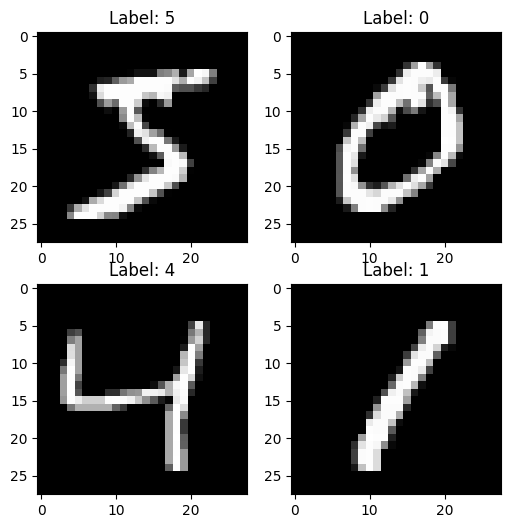

In [47]:
np.random.seed(42)

class Layer:
    def __init__(self):
        """Here you can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        self.weights = np.zeros(shape=(input.shape[1], 10))
        bias = np.zeros(shape=(10,))
        pass
    
    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, 10]
        """
        output = np.matmul(input, self.weights) + bias
        return output

class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate=0.01):
        self.learning_rate = learning_rate
        
        # initialize weights with small random numbers. We use normal initialization
        self.weights = np.random.randn(input_units, output_units)*0.01
        self.biases = np.zeros(output_units)
        
    def forward(self,input):
        return np.matmul(input, self.weights) + self.biases
      
    def backward(self,input,grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output,np.transpose(self.weights))

        # compute gradient w.r.t. weights and biases
        grad_weights = np.transpose(np.dot(np.transpose(grad_output),input))
        grad_biases = np.sum(grad_output, axis = 0)
        
        # Here we perform a stochastic gradient descent step. 
        # Later on, you can try replacing that with something better.
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        return grad_input

class ReLU(Layer):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass
    
    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        return np.maximum(0,input)

    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = input > 0
        return grad_output*relu_grad 

def softmax_crossentropy_with_logits(logits,reference_answers):
    """Compute crossentropy from logits[batch,n_classes] and ids of correct answers"""
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    
    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
    
    return xentropy

def grad_softmax_crossentropy_with_logits(logits,reference_answers):
    """Compute crossentropy gradient from logits[batch,n_classes] and ids of correct answers"""
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- ones_for_answers + softmax) / logits.shape[0]
  

def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

    # normalize x
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.

    # we reserve the last 10000 training examples for validation
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]

    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])

    return X_train, y_train, X_val, y_val, X_test, y_test


X_train, y_train, X_val, y_val, X_test, y_test = load_dataset(flatten=True)

plt.figure(figsize=[6,6])
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title("Label: %i"%y_train[i])
    plt.imshow(X_train[i].reshape([28,28]),cmap='gray')
    
network = []
network.append(Dense(X_train.shape[1],200))
network.append(ReLU())
network.append(Dense(200,100))
network.append(ReLU())
network.append(Dense(100,10))

def forward(network, X):
    """
    Compute activations of all network layers by applying them sequentially.
    Return a list of activations for each layer. 
    Make sure last activation corresponds to network logits.
    """
    activations = []
    input = X
    for i in range(len(network)):
        activations.append(network[i].forward(X))
        X = network[i].forward(X)
        
    assert len(activations) == len(network)
    return activations

def predict(network,X):
    """
    Compute network predictions.
    """
    logits = forward(network,X)[-1]
    return logits.argmax(axis=-1)

def train(network,X,y):
    """
    Train your network on a given batch of X and y.
    You first need to run forward to get all layer activations.
    Then you can run layer.backward going from last to first layer.
    After you called backward for all layers, all Dense layers have already made one gradient step.
    """
    
    # Get the layer activations
    layer_activations = forward(network,X)
    logits = layer_activations[-1]
    
    # Compute the loss and the initial gradient
    loss = softmax_crossentropy_with_logits(logits,y)
    loss_grad = grad_softmax_crossentropy_with_logits(logits,y)
    
    for i in range(1, len(network)):
        loss_grad = network[len(network) - i].backward(layer_activations[len(network) - i - 1], loss_grad)
    
    return np.mean(loss)

from tqdm import trange
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in trange(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]
        
train_log = []
val_log = []
lossFunc=[]
epochs=100
for epoch in range(epochs):
    loss=[]
    print(f"epoch: {epoch+1}/{epochs}")
    
    for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=32,shuffle=True):
        lf=train(network,x_batch,y_batch)
        loss.append(lf)
        
    lossFunc.append(sum(loss)/len(loss))
    print(f"Loss: {lossFunc[-1]}")
    train_log.append(np.mean(predict(network,X_train)==y_train))
    print(f"Accuracy: {train_log[-1]}")
    val_log.append(np.mean(predict(network,X_val)==y_val))


Epoch 100
Train accuracy: 0.98152
Val accuracy: 0.9612
Train loss: 0.06954235347505575


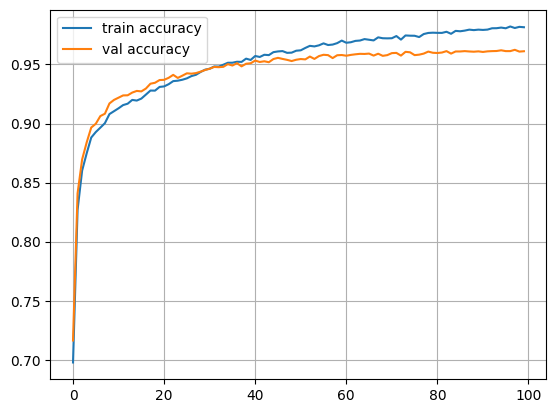

In [51]:
print("Epoch",epoch+1)
print("Train accuracy:",train_log[-1])
print("Val accuracy:",val_log[-1])
print("Train loss:", lossFunc[-1])
plt.plot(train_log,label='train accuracy')
plt.plot(val_log,label='val accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

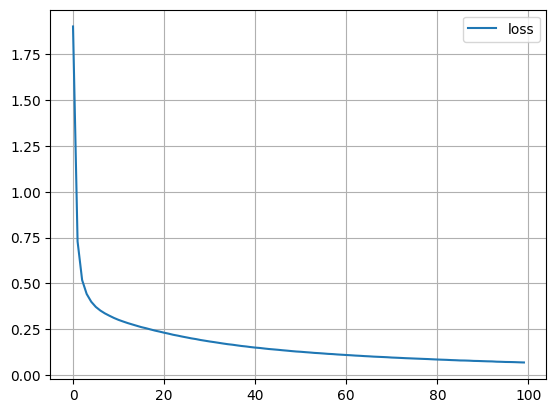

In [52]:
plt.plot(lossFunc,label='loss')
plt.legend(loc='best')
plt.grid()
plt.show()

In [55]:
lb_pre=predict(network,X_test)

In [54]:
len(y_test[y_test==predict(network,X_test)])/len(X_test) * 100

96.15

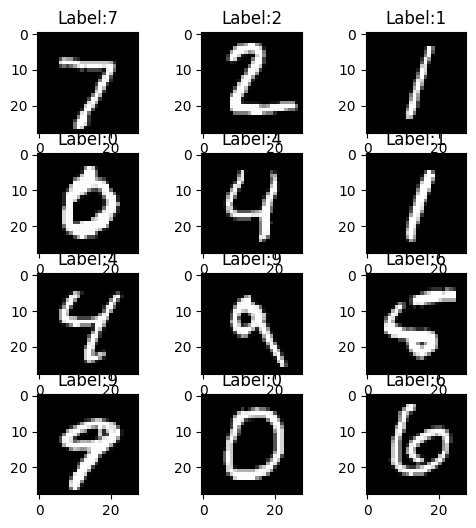

In [56]:
plt.figure(figsize=[6,6])
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.title(f"Label:{lb_pre[i]}")
    plt.imshow(X_test[i].reshape([28,28]),cmap='gray')

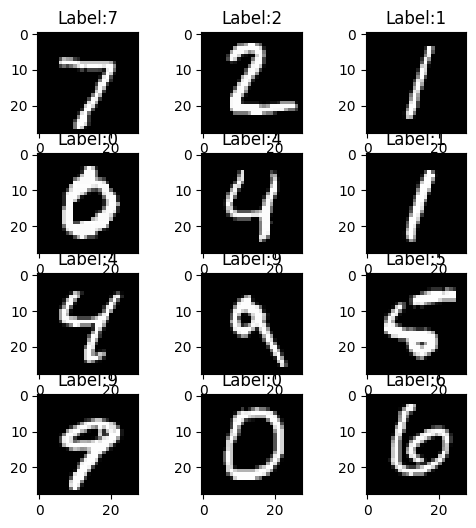

In [57]:
plt.figure(figsize=[6,6])
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.title(f"Label:{y_test[i]}")
    plt.imshow(X_test[i].reshape([28,28]),cmap='gray')